In [30]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.2


preds = model.predict_classes(test_sequences)
preds.shape, test_labels.shapepreds = model.predict_classes(test_sequences)
preds.shape, test_labels.shapepredpreds = model.predict_classes(test_sequences)
preds.shape, test_labels.shapepredkfj ndvjk dnsfvjsdfvdfdfdfgdsfv## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [32]:
data = nlp.load_dataset("emotion")

Using custom data configuration default


In [33]:
type(data)

nlp.dataset_dict.DatasetDict

In [34]:
data.keys()

dict_keys(['train', 'validation', 'test'])

In [35]:
train_set = data["train"]
test_set = data["test"]
val_set = data["validation"]

In [36]:
def get_tweets(data):
  tweets = [x["text"] for x in data]
  labels = [x["label"] for x in data] 
  return tweets,labels

In [37]:
x_train, y_train = get_tweets(train_set)

In [38]:
len(x_train)

16000

## Tokenizer

1. Tokenizing the tweets
*   Tokenizing is used to convert word or we can say text into numbers





In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [41]:
token = Tokenizer(num_words=10000,oov_token='<UNK>')
token.fit_on_texts(x_train)


## Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

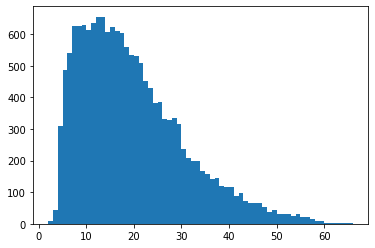

In [42]:
lenghts = [len(x.split(' ')) for x in x_train]
plt.hist([lenghts],bins=len(set(lenghts)))
plt.show()

In [43]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_sequence(token,tweets):
  sequence = token.texts_to_sequences(tweets)
  padded = pad_sequences(sequence,truncating='post',padding='post',maxlen = 50)
  return padded

In [44]:
x_train_padded = get_sequence(token,x_train)

In [45]:
x_train_padded[0] #hence we can see that after 4th one all are trunceted by 0 as a result of padding

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [46]:
classes = set(y_train) #will give the unique output in labels
print(classes)

{'anger', 'sadness', 'love', 'surprise', 'fear', 'joy'}


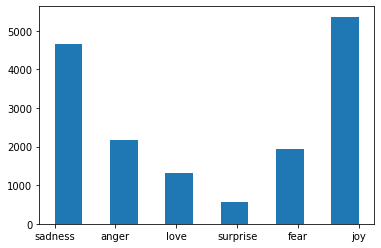

In [47]:
plt.hist(y_train,bins=11)
plt.show()

In [48]:
class_to_index = dict((c,i) for i,c in enumerate(classes))

In [49]:
index_to_class = dict((v,k) for v,k in enumerate(class_to_index))

In [50]:
index_to_class

{0: 'anger', 1: 'sadness', 2: 'love', 3: 'surprise', 4: 'fear', 5: 'joy'}

In [51]:
class_to_index

{'anger': 0, 'fear': 4, 'joy': 5, 'love': 2, 'sadness': 1, 'surprise': 3}

In [52]:
for i in range(4):
  print(type(y_train[i]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [53]:
def number_to_ids(Y):
  y = np.zeros(len(Y))
  for i in range(len(Y)):
    y[i] = class_to_index[Y[i]]
  return y
#lambda function
#number_to_ids = lambda y_train:np.array([class_to_index.get(x) for x in y_train])
y_train_in_num = number_to_ids(y_train)

In [54]:
len(y_train_in_num)

16000

## Creating the Model

1. Creating the model
2. Compiling the model

In [55]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000,16,input_length = 50),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences =True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6,activation ='softmax')
])

model.compile(
    loss= 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [58]:
X_val, y_val = get_tweets(val_set)
val_set_padded = get_sequence(token,X_val)
y_val_number = number_to_ids(y_val)

In [59]:
X_val[0],val_set_padded[0],y_val[0],y_val_number[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon',
 array([ 17,   8, 157, 260,   4, 343,  16,  51,  19, 212,   1,  50,  10,
         13, 533,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32),
 'sadness',
 1.0)

## Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

In [60]:
h = model.fit(x_train_padded,y_train_in_num, 
              validation_data=(val_set_padded,y_val_number),
              epochs = 20,
              callbacks =[
                          tf.keras.callbacks.EarlyStopping(monitor ='val_accuracy', patience=2)
              ]
             )


Epoch 1/20
500/500 [==============================] - 34s 54ms/step - loss: 1.3493 - accuracy: 0.4854 - val_loss: 1.1062 - val_accuracy: 0.6105
Epoch 2/20
500/500 [==============================] - 26s 52ms/step - loss: 0.9029 - accuracy: 0.6762 - val_loss: 0.7626 - val_accuracy: 0.7460
Epoch 3/20
500/500 [==============================] - 26s 53ms/step - loss: 0.5108 - accuracy: 0.8325 - val_loss: 0.5635 - val_accuracy: 0.8035
Epoch 4/20
500/500 [==============================] - 25s 51ms/step - loss: 0.3295 - accuracy: 0.8929 - val_loss: 0.4698 - val_accuracy: 0.8585
Epoch 5/20
500/500 [==============================] - 28s 55ms/step - loss: 0.2451 - accuracy: 0.9249 - val_loss: 0.4168 - val_accuracy: 0.8640
Epoch 6/20
500/500 [==============================] - 26s 52ms/step - loss: 0.1747 - accuracy: 0.9467 - val_loss: 0.3788 - val_accuracy: 0.8805
Epoch 7/20
500/500 [==============================] - 27s 54ms/step - loss: 0.1273 - accuracy: 0.9627 - val_loss: 0.4235 - val_accuracy:

In [61]:
x_test,y_test = get_tweets(test_set)
x_test_padded = get_sequence(token,x_test)
y_test_num = number_to_ids(y_test)

In [62]:
print(f"Accuracy : {model.evaluate(x_test_padded,y_test_num)[1]*100}%")

63/63 [==============================] - 1s 15ms/step - loss: 0.4707 - accuracy: 0.8870
Accuracy : 88.7000024318695%


In [70]:
preds = np.argmax(model.predict(x_test_padded), axis=-1)

(2000, 100000)

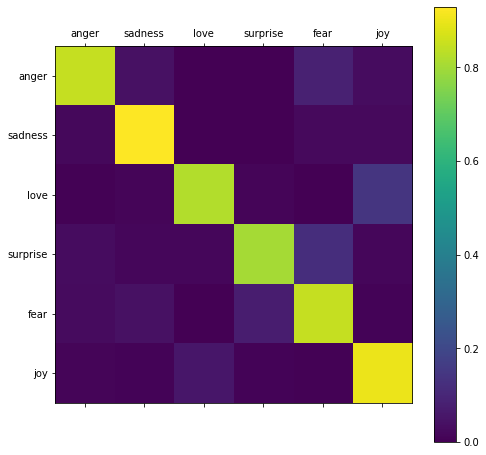

In [72]:
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


show_confusion_matrix(y_test_num, preds, list(classes))

## Random Thought

In [ ]:
i = random.randint(0,len(y_test_num)-1)
print(f"Sentence: {x_test[i]}")
print(f"Emotion: {y_test[i]}")
p = model.predict(np.expand_dims(x_test_padded[i],axis=0))[0] #it will give the array of 6 element and max one is the answer
pred_class = index_to_class[np.argmax(p)] 
#np.argmax(p)-> will return the index of largest element
pred_class